### 读取 玻璃数据 ，观察特征之间的相关性，思考多重共线性的问题，然后 使用 LogisticRegression 与 PCA 分析测试集预测准确率最高时主成分的数量。

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
sh=pd.read_csv(r'C:\Users\YcAllenEffy\Desktop\glass.csv')
df=sh.copy()
df

,id,refractive,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


<AxesSubplot:>

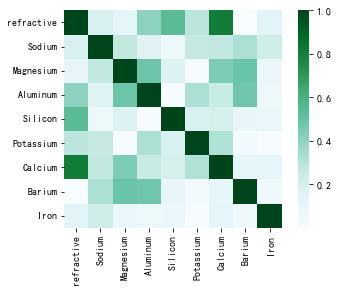

In [6]:
# 画热力图
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family']=['simhei']
plt.rcParams['axes.unicode_minus']=False

sns.heatmap(abs(df.iloc[:,1:-1].corr()),vmax=1,square=True,cmap='BuGn')

In [14]:
# 逻辑回归模型训练
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

#划分训练,测试集
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,1:-1],df.iloc[:,-1],random_state=42)

#训练模型
model= LogisticRegression(solver='newton-cg')
model.fit(x_train,y_train)
#打分
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)

0.6481481481481481

In [31]:
# 主成分分析
from sklearn.decomposition import PCA

for i in range(9):
    print(i+1)
    p=PCA(n_components=i+1)

    #划分训练,测试集
    x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,1:-1],df.iloc[:,-1],random_state=42)

    x_train=p.fit_transform(x_train)
    x_test=p.transform(x_test)

    # 逻辑回归训练模型
    model= LogisticRegression(solver='newton-cg')
    model.fit(x_train,y_train)

    #打分
    y_predict=model.predict(x_test)
    print(accuracy_score(y_test,y_predict))

1
0.25925925925925924
2
0.7037037037037037
3
0.7037037037037037
4
0.6851851851851852
5
0.6481481481481481
6
0.7037037037037037
7
0.6481481481481481
8
0.6481481481481481
9
0.6481481481481481


主成分数量为1时, 准确率： 0.25925925925925924
主成分数量为2时, 准确率： 0.7037037037037037
主成分数量为3时, 准确率： 0.7037037037037037
主成分数量为4时, 准确率： 0.6851851851851852
主成分数量为5时, 准确率： 0.6481481481481481
主成分数量为6时, 准确率： 0.7037037037037037
主成分数量为7时, 准确率： 0.6481481481481481
主成分数量为8时, 准确率： 0.6481481481481481
主成分数量为9时, 准确率： 0.6481481481481481


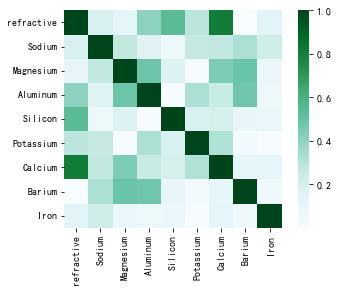

In [32]:
# 标准答案
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

plt.rcParams['axes.unicode_minus'] = False

# 读取数据
df = sh.copy()
# 查看相关性
sns.heatmap( abs( df.iloc[:,1:-1].corr() ), vmax=1, square=True, cmap='BuGn' )
# 拆分数据集
x_train, x_test, y_train, y_test = train_test_split( 
                    df.iloc[:,1:-1], df.iloc[:,-1], random_state=42 )

# 主成分数量1~9，计算测试集预测的准确性
for n in range(1, 10):
    # 创建PCA工具，转换到新指标集
    p = PCA(n_components=n)
    pca_train = p.fit_transform( x_train )
    pca_test = p.transform( x_test )
    # 训练
    model = LogisticRegression(solver='newton-cg')
    model.fit( pca_train, y_train )
    # 预测测试集
    y_predict = model.predict( pca_test )
    # 计算准确性
    print(f'主成分数量为{n}时, 准确率：', accuracy_score( y_test, y_predict ))